<a href="https://colab.research.google.com/github/DipuSharma/CRUD/blob/master/Json_Data_Polygon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

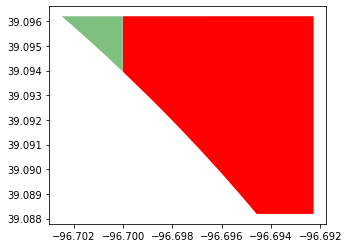

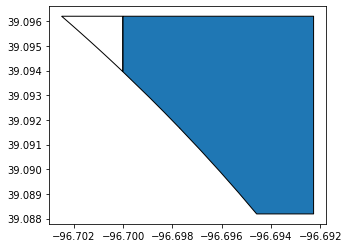

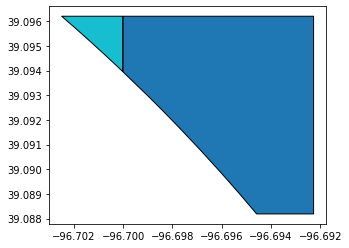

In [11]:
import pandas as pd
import geopandas
import matplotlib.pyplot as plt

import json
import ast
#import geojsonio as gp

with open('/content/sample_data/Polygon.json') as ply_json:
    read = json.load(ply_json)
    access = read['data']
    replan = access['replan_suggestions']
    geography1 = json.dumps(replan[0]['geography'], indent=4)
    geography2 = json.dumps(replan[1]['geography'], indent=4)
    # gp.display(geography1)
    # gp.display(geography2)
    plot1 = json.dumps(replan[0]['geography'][0]['coordinates'][0], indent=4)
    plot2 = json.dumps(replan[1]['geography'][0]['coordinates'][0], indent=4)
    res = ast.literal_eval(plot1)
    res1 = ast.literal_eval(plot2)
    ###    Geography index [0] and this coordinates [8]  points are overlapp to each other  ########
    ###    and some coordinates no required for given Polygon Geography ########
    # print(res)
    # print(res1)

res
res1

from shapely.geometry import Polygon

polys1 = geopandas.GeoSeries([Polygon(res)])
polys2 = geopandas.GeoSeries([Polygon(res1)])


df1 = geopandas.GeoDataFrame({'geometry': polys1, 'df1':[1]})
df2 = geopandas.GeoDataFrame({'geometry': polys2, 'df2':[1]})

ax = df1.plot(color='red');

df2.plot(ax=ax, color='green', alpha=0.5);

#difference
res_difference = geopandas.overlay(df1, df2, how='difference')

res_difference


ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');

#symmetric_difference
res_difference = geopandas.overlay(df1, df2, how='symmetric_difference')

res_difference


ax = res_difference.plot(cmap='tab10')

df1.plot(ax=ax, facecolor='none', edgecolor='k');

df2.plot(ax=ax, facecolor='none', edgecolor='k');